In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
data = pd.read_csv('fer2013.csv')

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27996 entries, 0 to 27995
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  27996 non-null  int64 
 1   pixels   27996 non-null  object
 2   Usage    27995 non-null  object
dtypes: int64(1), object(2)
memory usage: 656.3+ KB


In [ ]:
data.shape

(27996, 3)

In [ ]:
data.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
data['pixels'].iloc[0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
label_data = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [ ]:
pixel = data['pixels']

In [ ]:
pixel = np.array(pixel)

In [ ]:
pixel.shape

(27996,)

In [ ]:
pixel[0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
np.array(data.pixels.loc[0].split(' ')).reshape(48,48).astype('float')

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]])

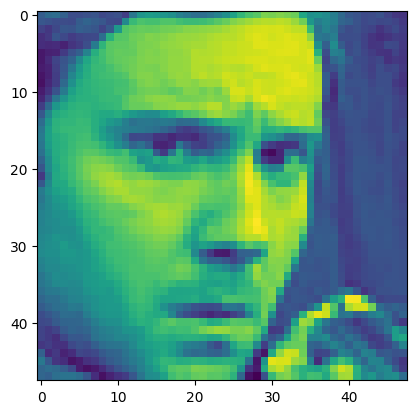

In [ ]:
plt.imshow(np.array(data.pixels.loc[0].split(' ')).reshape(48,48).astype('float'))

In [ ]:
data['pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

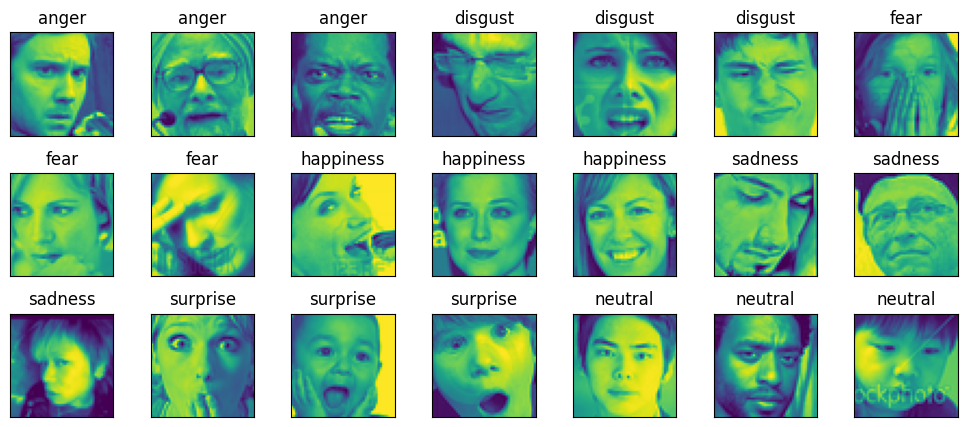

In [ ]:
fig = plt.figure(1, (10,10))
k = 0
for label in sorted(data.emotion.unique()):
  for j in range(3):
    px = data[data.emotion==label].pixels.iloc[k]
    px=np.array(px.split(' ')).reshape(48,48).astype('float32')
    k+=1
    ax = plt.subplot(7,7,k)
    ax.imshow(px)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label_data[label])
    plt.tight_layout()






In [ ]:
data = data.iloc[:-1]

img_array = data.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48,48).astype('float32'))

In [ ]:
img_array


0        [[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...
1        [[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...
2        [[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...
3        [[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...
4        [[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                               ...                        
27990    [[216.0, 216.0, 216.0, 216.0, 216.0, 214.0, 22...
27991    [[181.0, 185.0, 163.0, 152.0, 165.0, 165.0, 16...
27992    [[112.0, 165.0, 159.0, 144.0, 161.0, 156.0, 13...
27993    [[128.0, 126.0, 125.0, 126.0, 125.0, 126.0, 12...
27994    [[163.0, 163.0, 159.0, 163.0, 169.0, 171.0, 17...
Name: pixels, Length: 27995, dtype: object

In [ ]:
img_array = img_array[:-1]

In [ ]:
img_array

0        [[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...
1        [[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...
2        [[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...
3        [[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...
4        [[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                               ...                        
27990    [[216.0, 216.0, 216.0, 216.0, 216.0, 214.0, 22...
27991    [[181.0, 185.0, 163.0, 152.0, 165.0, 165.0, 16...
27992    [[112.0, 165.0, 159.0, 144.0, 161.0, 156.0, 13...
27993    [[128.0, 126.0, 125.0, 126.0, 125.0, 126.0, 12...
27994    [[163.0, 163.0, 159.0, 163.0, 169.0, 171.0, 17...
Name: pixels, Length: 27995, dtype: object

In [ ]:
img_array.shape

(27995,)

In [ ]:
img_array = np.stack(img_array,axis=0)

In [ ]:
img_array.shape

(27995, 48, 48)

In [ ]:
labels = data.emotion.values

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(img_array,labels,test_size = 0.1)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25195, 48, 48), (2800, 48, 48), (25195,), (2800,))

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
models = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPool2D(2, 2),
    layers.BatchNormalization(),

    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.BatchNormalization(),

    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
])

In [ ]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 23, 23, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 16)        0         
 g2D)                                                            
                                                        

In [ ]:
models.compile(tf.keras.optimizers.Adam(learning_rate = 0.01),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
models.fit(X_train,y_train,epochs = 10)

Epoch 1/10
788/788 [==============================] - 62s 78ms/step - loss: 1.1137 - accuracy: 0.5775
Epoch 2/10
788/788 [==============================] - 50s 64ms/step - loss: 1.1006 - accuracy: 0.5816
Epoch 3/10
788/788 [==============================] - 53s 68ms/step - loss: 1.0868 - accuracy: 0.5897
Epoch 4/10
788/788 [==============================] - 52s 65ms/step - loss: 1.0746 - accuracy: 0.5945
Epoch 5/10
788/788 [==============================] - 52s 66ms/step - loss: 1.0614 - accuracy: 0.6006
Epoch 6/10
788/788 [==============================] - 71s 90ms/step - loss: 1.0469 - accuracy: 0.6038
Epoch 7/10
788/788 [==============================] - 52s 66ms/step - loss: 1.0413 - accuracy: 0.6077
Epoch 8/10
788/788 [==============================] - 51s 64ms/step - loss: 1.0282 - accuracy: 0.6135
Epoch 9/10
788/788 [==============================] - 52s 65ms/step - loss: 1.0143 - accuracy: 0.6152
Epoch 10/10
788/788 [==============================] - 52s 66ms/step - loss: 1.009

In [ ]:
models.fit(X_train,y_train,epochs = 20, validation_split = .2)

Epoch 1/20
630/630 [==============================] - 44s 69ms/step - loss: 0.8625 - accuracy: 0.6701 - val_loss: 1.0855 - val_accuracy: 0.5985
Epoch 2/20
630/630 [==============================] - 44s 69ms/step - loss: 0.8545 - accuracy: 0.6718 - val_loss: 1.1358 - val_accuracy: 0.5902
Epoch 3/20
630/630 [==============================] - 41s 66ms/step - loss: 0.8496 - accuracy: 0.6751 - val_loss: 1.1237 - val_accuracy: 0.6077
Epoch 4/20
630/630 [==============================] - 41s 65ms/step - loss: 0.8409 - accuracy: 0.6817 - val_loss: 1.2761 - val_accuracy: 0.5533
Epoch 5/20
630/630 [==============================] - 41s 65ms/step - loss: 0.8419 - accuracy: 0.6809 - val_loss: 1.1326 - val_accuracy: 0.5886
Epoch 6/20
630/630 [==============================] - 44s 69ms/step - loss: 0.8319 - accuracy: 0.6813 - val_loss: 1.2330 - val_accuracy: 0.5801
Epoch 7/20
630/630 [==============================] - 41s 66ms/step - loss: 0.8267 - accuracy: 0.6861 - val_loss: 1.1834 - val_accuracy:

Actual label is happiness
1/1 [==============================] - 0s 26ms/step
Predicted label is happiness


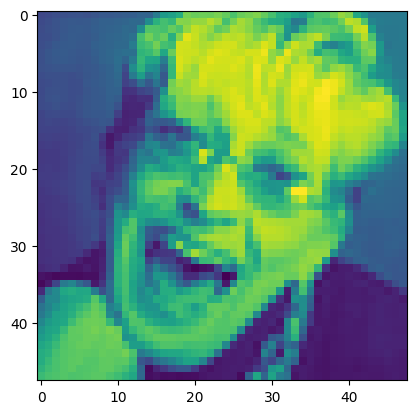

KeyboardInterrupt: ignored

In [ ]:
from IPython.display import clear_output

import time

for k in range (40):
  print(f"Actual label is {label_data[y_test[k]]}")
  pred = models.predict(tf.expand_dims(X_test[k],0)).argmax()
  print(f"Predicted label is {label_data[pred]}")
  plt.imshow(X_test[k].reshape(48,48))
  plt.show()
  time.sleep(4)
  clear_output(wait = True)


In [ ]:
models.predict(X_test[:5]).argmax(axis=1)

1/1 [==============================] - 0s 34ms/step


array([3, 2, 3, 5, 4])

In [ ]:
y_test[:5]

array([3, 4, 3, 4, 2])